In [1]:
# Import BasicsLibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset of Heart.csv 
df=pd.read_csv('heart.csv')

In [3]:
#Check 5 records from dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [4]:
#Check no of columns and rows in dataset
df.shape

(303, 14)

In [5]:
#Check for Null values in each columns
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Here no null values observed so we will cross check for null values through datatypes 
#as observed through dataset that each columns type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#Now Check the Duplicated Values in Dataset(Rows)
df.duplicated().sum()

1

In [8]:
#Here One duplicate Values observed now we will check which row has duplicate value

#Find The row which is duplicated:-
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
#Here Row no 164 has duplicate values now we will drop the duplicate values from dataset permantently
df.drop_duplicates(inplace=True)

In [10]:
#Now Again cross check the duplicate values
df.duplicated().sum()

0

In [11]:
#Check rows and columns again
df.shape

(302, 14)

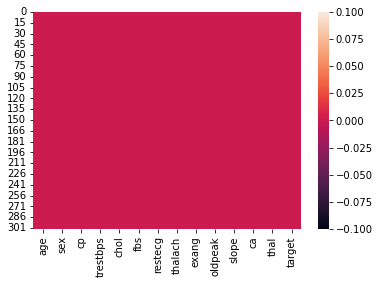

In [12]:
#Check null values with visualisation through Heatmap
sb.heatmap(df.isnull())
plt.show()


#No null values observed through heatmap

In [13]:
#Now check data is Balanced or Unbalanced
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

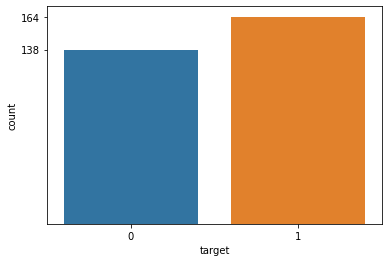

In [14]:
#Check Data is Balanced or Unbalanced through Countplot
sb.countplot(data=df,x='target')
a=df['target'].value_counts()
plt.yticks((a))
plt.show()

In [15]:
#Here we can see that data is Balanced

In [16]:
#Now select Inputs and Output and assign them to variables
X=df.drop('target',axis=1)        # 'X' as input
Y=df['target']                    # 'Y' as output

In [17]:
#Check Input Columns 
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
#Here we can see that Dataset is balanced so we split dataset into 70 and 30 ratio for 
#Train and Test

In [19]:
#For That we call class for train_test_split
from sklearn.model_selection import train_test_split

In [20]:
#Here we train data on 70%  and Test data on 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
#Check the No.of data in X_train and Y_train
X_train.shape,Y_train.shape

((211, 13), (211,))

In [22]:
#Apply StandardScaler() on Input(X) by calling its class
from sklearn.preprocessing import StandardScaler

In [23]:
#Call class by creating its object
ss=StandardScaler()

In [24]:
#Apply standardscaler on Training and Testing data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [25]:
#Cross check the standardscaling been done
X_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

# LogisticRegression

In [26]:
#Now We will Train the model and give our dataset to LogisticRegression
#So We will call the class of logisticRegression by creating its object
from sklearn.linear_model import LogisticRegression

In [27]:
#Create an Function for calling of All data's like 70 training and 30% testing
#Classification Reports and Confusion Matrix

def create_model(model):
    
    #Train the Model with 70%
    model.fit(X_train,Y_train)
    
    #Test the Model with 30 data
    Y_pred=model.predict(X_test)
    
    #Now Generate Classification Reports and Confusion Matrix
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    
    return model    

In [28]:
#call Class of report generation and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
#create object of call lr
lr=LogisticRegression()

In [30]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [31]:
'''
From Logistic Regression model after training and testing we have got accuracy of 83% which is good 
but now we will give this  data to Decisiontree and then will check accuracy
'''

'\nFrom Logistic Regression model after training and testing we have got accuracy of 83% which is good \nbut now we will give this  data to Decisiontree and then will check accuracy\n'

# DecisionTree

In [32]:
#DecisionTree helps too find out which features(inputs) is good to find the better accuracy with out

In [33]:
#Now call class of DecisiontreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Create object for DecisionTreeClassifier()
dtc=DecisionTreeClassifier()

In [35]:
#Now Test the model with 30% and Train with 70%
#We have already created the fuunction for testing and training
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        38
           1       0.80      0.68      0.73        53

    accuracy                           0.71        91
   macro avg       0.72      0.72      0.71        91
weighted avg       0.73      0.71      0.72        91

[[29  9]
 [17 36]]


# Max_depth with Gini Index(Pruning Technique)

In [36]:
#Here from Decisiontree we have got less accuracy with respect too logsticregression 
#Now we will apply Pruning Techique on DecisionTree model(Gini index)

In [37]:
#Apply pruning technique : max_depth<=8 not more than 8
#Create object of DecisionTreeClassifier class and pass Parameter

dtc1=DecisionTreeClassifier(max_depth=3,random_state=1)
dtc1=create_model(dtc1)

#We will apply for loop technique for finding out on which the score is good and after that we will comment the for loop
'''for i in range(1,9,1):
    dtc1=DecisionTreeClassifier(max_depth=i,random_state=1)
    print('Max_Depth',i)
    dtc1=create_model(dtc1)'''

#Here after apply of for loop technique we found that max_depth has good score so on main code we will insert max_depth=3

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        38
           1       0.77      0.77      0.77        53

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

[[26 12]
 [12 41]]


"for i in range(1,9,1):\n    dtc1=DecisionTreeClassifier(max_depth=i,random_state=1)\n    print('Max_Depth',i)\n    dtc1=create_model(dtc1)"

# Min_samples_leaf with Gini Index(Pruning Technique)

In [38]:
#Now we will apply the Next Pruning Techique min_samples_leaf
#We will apply for loop technique for finding out on which the score is good and after that we will comment the for loop
'''
for i in range(44,101,1):
    dtc2=DecisionTreeClassifier(min_samples_leaf=i)
    print('Min Samples Leaf',i)
    dtc2=create_model(dtc2)
'''
#After For loop Technique we found that on Min_samples_leaf=44 the score is good so we will comment for loop technique and 
#and insert value 44 to main line comment
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


# Max_depth with Entropy(Pruning Technique)

In [39]:
#Apply pruning technique : max_depth<=8 not more than 8
#Create object of DecisionTreeClassifier class and pass Parameter

dtc1=DecisionTreeClassifier(max_depth=1,criterion='entropy')
dtc1=create_model(dtc1)

#We will apply for loop technique for finding out on which the score is good and after that we will comment the for loop
'''
for i in range(1,9,1):
    dtc3=DecisionTreeClassifier(max_depth=i,criterion='entropy')
    print('Max_Depth',i)
    dtc3=create_model(dtc3)
'''

#Here after apply of for loop technique we found that max_depth has good score so on main code we will insert max_depth=3

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


"\nfor i in range(1,9,1):\n    dtc3=DecisionTreeClassifier(max_depth=i,criterion='entropy')\n    print('Max_Depth',i)\n    dtc3=create_model(dtc3)\n"

# Min_samples_Leaf with Entropy (Pruning Technique)

In [40]:
#Now we will apply the Next Pruning Techique min_samples_leaf
#We will apply for loop technique for finding out on which the score is good and after that we will comment the for loop

'''
for i in range(44,101,1):
    dtc2=DecisionTreeClassifier(min_samples_leaf=i,criterion='entropy')
    print('Min Samples Leaf',i)
    dtc2=create_model(dtc2)
   
'''
#After For loop Technique we found that on Min_samples_leaf=44 the score is good so we will comment for loop technique and 
#and insert value 44 to main line comment
dtc2=DecisionTreeClassifier(random_state=1,min_samples_leaf=44,criterion='entropy')
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [41]:
#Here after Providing data to Pruning technique we have not got the good accuracy now we will give this dataset to 
#ensemblin tecnique

# Ensembling Technique

In [67]:
#Applying ensembling technique with RandomForest(It is Bootstamping method) with bagging 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

#Apply Looping  concept for finding n_estimators

'''for i in range(13,1,-1):
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1)
    print('No.of Features',i)
    
    #call Function
    rfc=create_model(rfc)'''
    


rfc=RandomForestClassifier(n_estimators=10,max_features=11,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71        38
           1       0.82      0.68      0.74        53

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.74      0.73      0.73        91

[[30  8]
 [17 36]]


In [68]:
#Use Entropy

'''for i in range(13,1,-1):
    rfc=RandomForestClassifier(n_estimators=10,max_features=i,random_state=1,criterion='entropy')
    print('No.of Features',i)
    
    #call Function
    rfc=create_model(rfc)'''
    
    
rfc=RandomForestClassifier(n_estimators=10,max_features=7,random_state=1,criterion='entropy')
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.65      0.82      0.72        38
           1       0.84      0.68      0.75        53

    accuracy                           0.74        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.76      0.74      0.74        91

[[31  7]
 [17 36]]


# ADA Boosting(Boosting Technique)

In [44]:
#Call class of AdaBoostClassifier class :
from sklearn.ensemble import AdaBoostClassifier

In [45]:
#Create object for AdaBoostClassifier class()
abc=AdaBoostClassifier(n_estimators=6,random_state=1)
abc=create_model(abc)


'''
for i in range(1,17):
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('No.of DecisionStump',i)
    #Call function
    abc=create_model(abc)
    
'''

#Here After looping Technique in ADA Boost we found total n_estimators=6

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27 11]
 [10 43]]


"\nfor i in range(1,17):\n    abc=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print('No.of DecisionStump',i)\n    #Call function\n    abc=create_model(abc)\n    \n"

# Gradient boosting

In [46]:
#Call Class of GradientBoosting on same dataset
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
#Call function wih class
gbc=GradientBoostingClassifier(n_estimators=11,random_state=1)
gbc=create_model(gbc)

'''
for i in range(10,101,1):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No. of Estimators',i)
    gbc=create_model(gbc)
    
'''
    
#Here After looping Technique in GradientBoosting we found total n_estimators=11

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


"\nfor i in range(10,101,1):\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print('No. of Estimators',i)\n    gbc=create_model(gbc)\n    \n"

# XGB extreme gradient Boosting

In [48]:
#Install Packae of XGB Boosting 
#!pip install xgboost

In [49]:
#Call function
from xgboost import XGBClassifier

In [50]:
#Create object of XGBClassifier()
#Call function wih class
xgb=XGBClassifier(n_estimators=18,reg_alpha=1,random_state=1)
xgb=create_model(xgb)


'''
for i in range(10,101,1):
    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)
    print('No. of Estimators',i)
    xgb=create_model(xgb)
    
'''


#Here After looping Technique in GradientBoosting we found total n_estimators=18

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]


"\nfor i in range(10,101,1):\n    xgb=XGBClassifier(n_estimators=i,reg_alpha=1,random_state=1)\n    print('No. of Estimators',i)\n    xgb=create_model(xgb)\n    \n"

# Support Vector Machine (SVM)

In [51]:
#LinearSVC means LinearSupport Classifier
from sklearn.svm import LinearSVC   

#Create object for svm
svc=LinearSVC(random_state=1)

#call function for LinearSVC
svc=create_model(svc)


              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [52]:
#Create object of LinearSVC class and some external error
svc1=LinearSVC(random_state=1,C=0.01)



#Here C denotes adding of error to data set 
#The rnage of adding of data start from 0.001 to 1

#Call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.81      0.87      0.84        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91

[[27 11]
 [ 7 46]]


# Polynomial support vector classifier

In [53]:
#Use polynomial kernel function use inbuilt class svc (support vector classisfier)
from sklearn.svm import SVC

#SVC used for polynomial and Radial basis both are used for non-linear data

In [54]:
#create object for svc
svc2=SVC(random_state=1,kernel='poly')
             
#Call Function
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[29  9]
 [ 7 46]]


# Radial Support vector classifier

In [55]:
#Create object for SVC class Radial
svc3=SVC(random_state=1,kernel='rbf')
svc3=create_model(svc3)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


# Conclusion

In [56]:
'''
Here From from above Checking on various Machine Learning Methods We Found That Polynomial Support Vector is best For this 
Dataset So by Using Polynomial Support Vector codes we will deploy to the model.
'''

'\nHere From from above Checking on various Machine Learning Methods We Found That Polynomial Support Vector is best For this \nDataset So by Using Polynomial Support Vector codes we will deploy to the model.\n'

In [57]:
#Install Streamlit for model Deployment
#!pip install streamlit

In [58]:
#Use file handling :- Serialization(python) convert data into binary 
#for programmer we use deserialisation it converts binary data to normal readlable data
#for this we use inbuilt package : Pickle of python  conversion of normal data to binary data
import pickle

In [59]:
#To open temporary file in write binary : wb
file1=open('model.pkl','wb')  #file1=Temporary file ,model.pkl is permanent file ,wb=is write in file 
#if not mentioned then by default it is in read format and also it is used for Decisiontreeclassifier object
file2=open('scale.pkl','wb') #it used to save the object of StandardScaler class

In [60]:
#dump() inbuilt method of pickle library 
pickle.dump(svc2,file1) #save object of DecisiontreeClassifier in file1
pickle.dump(ss,file2) # save object of StandardSclaer in file2

In [64]:
#Close file1 and file2 they are temporary files if not closed then file1 and file2 
#would be empty and data would not be shifted to model.pkl and scale.pkl
file1.close()
file2.close()

In [65]:
#open file in read binary  mode means rb
#use load() for read which  define in pickle and data hold on temperary file
file1=open('model.pkl','rb') #'rb' read mode and 'wb' write mode
file2=open('scale.pkl','rb') #'rb' read mode and 'wb' write mode

In [66]:
#To read data from temp file and hold in object
model=pickle.load(file1)  #to read data from file1 and hold object of model (user defined)
scale=pickle.load(file2)